# Z boson event codes

In [1]:
pip install uproot 

     -------------------------------------- 342.7/342.7 kB 3.5 MB/s eta 0:00:00
     -------------------------------------- 708.7/708.7 kB 4.1 MB/s eta 0:00:00
     -------------------------------------- 684.6/684.6 kB 2.7 MB/s eta 0:00:00
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 4.11.3
    Uninstalling importlib-metadata-4.11.3:
      Successfully uninstalled importlib-metadata-4.11.3
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install vector 

     -------------------------------------- 171.3/171.3 kB 2.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import uproot 
import vector 
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

The above codes install and import all the necessary software for use in a analysis. Below we wil now define functions that can be used to produce plots: 

In [68]:
def data_extract(rootfilename):

    # Opens the .root file and extract the data

    tree = uproot.open(rootfilename+'.root:Delphes')

    events = tree.arrays(['Event.Weight','Electron_size', 'Electron.PT', 'Electron.Eta', 'Electron.Phi',
                              'Muon_size', 'Muon.PT', 'Muon.Eta', 'Muon.Phi',
                          'Jet_size', 'Jet.PT', 'Jet.Eta', 'Jet.Phi', 'Jet.TauTag', 'Jet.Mass'])

    return events


def tau_dijet_plotter(jets):

    invariant_mass_array = np.array([])
    pt_array = np.array([])
    eta_array = np.array([])
    
    for i,event in enumerate(jets):
        
        number_of_taus = np.sum(event['Jet.TauTag'])
        number_of_electrons = event['Electron_size']
        number_of_muons = event['Muon_size']
        
        if number_of_taus == 2 and number_of_electrons == 0 and number_of_muons == 0 :  
            
            locations = np.array([np.where(event['Jet.TauTag']==1)])[0,0]
            
            four_vector = vector.zip({'pt':event['Jet.PT'],'eta':event['Jet.Eta'],'phi':event['Jet.Phi'],'mass':event['Jet.Mass']})
            #print(locations, four_vector)
            invariant_mass = (four_vector[locations[0]]+four_vector[locations[1]]).mass
            pt =(four_vector[locations[0]]+four_vector[locations[1]]).pt
            eta = (four_vector[locations[0]]+four_vector[locations[1]]).eta
            
            invariant_mass_array = np.append(invariant_mass_array,invariant_mass)
            pt_array = np.append(pt_array,pt)
            eta_array = np.append(eta_array, eta)

    return [invariant_mass_array, pt_array, eta_array]
    
    
    
def tau_jet_electron_plotter(data):

    invariant_mass_array = np.array([])
    pt_array = np.array([])
    eta_array = np.array([])
    
    for i,event in enumerate(data):
        
        number_of_taus = np.sum(event['Jet.TauTag'])
        number_of_electrons = event['Electron_size']
        number_of_muons = event['Muon_size']
        filter_array = [number_of_taus, number_of_electrons, number_of_muons]

        
        if filter_array==[1,1,0]: 
            
            jet_locations = np.where(event['Jet.TauTag']==1)
            e_locations = np.where(event['Electron.PT']!=0)
            #print(e_locations[0], jet_locations[0])
            
            jet_four_vector = vector.zip({'pt':event['Jet.PT'],'eta':event['Jet.Eta'],'phi':event['Jet.Phi'],'mass':event['Jet.Mass']})
           # print(jet_four_vector)
            electron_four_vector = vector.zip({'pt':data['Electron.PT'],'eta':data['Electron.Eta'],'phi':data['Electron.Phi'],'mass':0.0511})
            #print(electron_four_vector)
            invariant_mass = (jet_four_vector[jet_locations]+electron_four_vector[5]).mass
            pt = (jet_four_vector[jet_locations]+electron_four_vector[5]).pt
            eta = (jet_four_vector[jet_locations]+electron_four_vector[5]).eta
            
            invariant_mass_array = np.append(invariant_mass_array,invariant_mass)
            pt_array = np.append(pt_array,pt)
            eta_array = np.append(eta_array,eta)

    return [invariant_mass_array, pt_array, eta_array]
    
def tau_jet_muon_plotter(data):

    invariant_mass_array = np.array([])
    pt_array = np.array([])
    eta_array = np.array([])
    
    for i,event in enumerate(data):
        
        number_of_taus = np.sum(event['Jet.TauTag'])
        number_of_electrons = event['Electron_size']
        number_of_muons = event['Muon_size']
        #print(number_of_electrons, number_of_muons)
        
        if number_of_taus == 1 and number_of_electrons == 0 and number_of_muons == 1 : 
            
            jet_locations = np.where(event['Jet.TauTag']==1)
            
            jet_four_vector = vector.zip({'pt':event['Jet.PT'],'eta':event['Jet.Eta'],'phi':event['Jet.Phi'],'mass':event['Jet.Mass']})
            muon_four_vector = vector.zip({'pt':data['Muon.PT'],'eta':data['Muon.Eta'],'phi':data['Muon.Phi'],'mass':0.10566})
           # print(muon_four_vector)
            invariant_mass = (jet_four_vector[jet_locations]+muon_four_vector[0]).mass
            pt = (jet_four_vector[jet_locations]+muon_four_vector[0]).pt
            eta = (jet_four_vector[jet_locations]+muon_four_vector[0]).eta
            
            invariant_mass_array = np.append(invariant_mass_array,invariant_mass)
            pt_array = np.append(pt_array, pt)
            eta_array = np.append(eta_array, eta)

    return [invariant_mass_array, pt_array, eta_array]
    

def dimuon_plotter(events):

    # create filters to select the events of interest

    nmuon_mask = events['Muon_size'] == 2

    # create the dimuon system

    muons = vector.zip({'pt':events['Muon.PT'],'eta':events['Muon.Eta'],'phi':events['Muon.Phi'],'mass':0.10566})

    dimuon = muons[nmuon_mask]

    dimuon_mass = (dimuon[:,0]+dimuon[:,1]).mass
    dimuon_pt = (dimuon[:,0]+dimuon[:,1]).pt
    dimuon_eta = (dimuon[:,0]+dimuon[:,1]).eta

    return [dimuon_mass, dimuon_pt, dimuon_eta]


def dielectron_plotter(data):

    # create filters to select the events of interest

    nelectron_mask = data['Electron_size'] == 2

    # create the dielectron system

    electrons = vector.zip({'pt':data['Electron.PT'],'eta':data['Electron.Eta'],'phi':data['Electron.Phi'],'mass':0.0511})
    dielectron = electrons[nelectron_mask]

    #calculate the dielectron invariant mass and plot it using matplotlib

    dielectron_mass = (dielectron[:,0]+dielectron[:,1]).mass
    dielectron_pt = (dielectron[:,0]+dielectron[:,1]).pt
    dielectron_eta = (dielectron[:,0]+dielectron[:,1]).eta
    
    return [dielectron_mass, dielectron_pt, dielectron_eta]

def electron_muon_plotter(data):

    # create filters to select the events of interest

    muon_electron_mask = (data['Electron_size'] & data['Muon_size']) == 1

    electrons = vector.zip({'pt':data['Electron.PT'],'eta':data['Electron.Eta'],'phi':data['Electron.Phi'],'mass':0.0511})
    muons = vector.zip({'pt':data['Muon.PT'],'eta':data['Muon.Eta'],'phi':data['Muon.Phi'],'mass':0.10566})
    
    electron = electrons[muon_electron_mask]
    
    muon = muons[muon_electron_mask]
    
    #calculate the dilepton invariant mass and plot it using matplotlib

    dilepton_mass = (electron[:,0]+muon[:,0]).mass
    dilepton_pt = (electron[:,0]+muon[:,0]).pt
    dilepton_eta = (electron[:,0]+muon[:,0]).eta

    return [dilepton_mass, dilepton_pt, dilepton_eta]

def hist_plotter(data, min_, max_, imagename, title, xlabel):
    
    plt.hist(data,bins=50, range=(min_, max_), edgecolor = 'black')
    
    plt.title(title)

    plt.xlabel(xlabel)

    plt.ylabel('Events')
    
    total_count = len(data)

    plt.legend([f'Data (N={total_count})'])

    plt.savefig(imagename+".png")

    plt.show()

    
def total_plotter(ee, mm, em, jj, je, jm, stack, filename, imagename, min_, max_):
    
    eta_range = [-6,6]
    pt_range = [0,100]
    
    raw_data = data_extract(filename)
    number_variables = ee + mm + em + jj + je + jm
    
    colors = []
    labels = []
    combined_data = [[],[],[]]
    
    if ee == 1:
        plot_data = dielectron_plotter(raw_data)
        hist_plotter(plot_data[0], min_, max_, (imagename+'_ee_mass'), 'Histogram of Invariant Mass - Dielectron', 'Mass [GeV]')
        hist_plotter(plot_data[1], pt_range[0], pt_range[1], (imagename+'_ee_pt'), 'Histogram of Transverse Momentum - Dielectron', 'Pt [GeV]')
        hist_plotter(plot_data[2], eta_range[0], eta_range[1], (imagename+'_ee_eta'), 'Histogram of Rapidity - Dielectron', 'Eta')
        for i in np.linspace(0,2,num=3):
            combined_data[int(i)].append(plot_data[int(i)])
        labels.append('dielectron')
        colors.append('blue')
    if mm == 1:
        plot_data = dimuon_plotter(raw_data)
        hist_plotter(plot_data[0], min_, max_, (imagename+'_mm_mass'), 'Histogram of Invariant Mass - Dimuon', 'Mass [GeV]')
        hist_plotter(plot_data[1], pt_range[0], pt_range[1], (imagename+'_mm_pt'), 'Histogram of Transverse Momentum - Dimuon', 'Pt [GeV]')
        hist_plotter(plot_data[2], eta_range[0], eta_range[1], (imagename+'_mm_eta'), 'Histogram of Rapidity - Dimuon', 'Eta')
        for i in np.linspace(0,2,num=3):
            combined_data[int(i)].append(plot_data[int(i)])
        labels.append('dimuon')
        colors.append('red')
    if em == 1:
        plot_data = electron_muon_plotter(raw_data)
        hist_plotter(plot_data[0], min_, max_, (imagename+'_em_mass'), 'Histogram of Invariant Mass - Electron & Muon', 'Mass [GeV]')
        hist_plotter(plot_data[1], pt_range[0], pt_range[1], (imagename+'_em_pt'), 'Histogram of Transverse Momentum - Electron & Muon', 'Pt [GeV]')
        hist_plotter(plot_data[2], eta_range[0], eta_range[1], (imagename+'_em_eta'), 'Histogram of Rapidity - Electron & Muon', 'Eta')
        for i in np.linspace(0,2,num=3):
            combined_data[int(i)].append(plot_data[int(i)])
        labels.append('electron & muon')
        colors.append('green')
    if jj == 1:
        plot_data = tau_dijet_plotter(raw_data)
        hist_plotter(plot_data[0], min_, max_, (imagename+'_jj_mass'), 'Histogram of Invariant Mass - Tau Dijet', 'Mass [GeV]')
        hist_plotter(plot_data[1], pt_range[0], pt_range[1], (imagename+'_jj_pt'), 'Histogram of Transverse Momentum - Tau Dijet', 'Pt [GeV]')
        hist_plotter(plot_data[2], eta_range[0], eta_range[1], (imagename+'_jj_eta'), 'Histogram of Rapidity - Tau Dijet', 'Eta')
        for i in np.linspace(0,2,num=3):
            combined_data[int(i)].append(plot_data[int(i)])
        labels.append('ditau jets')
        colors.append('orange')
    if je == 1:
        plot_data = tau_jet_electron_plotter(raw_data)
        hist_plotter(plot_data[0], min_, max_, (imagename+'_je_mass'), 'Histogram of Invariant Mass - Tau jet & Electron', 'Mass [GeV]')
        hist_plotter(plot_data[1], pt_range[0], pt_range[1], (imagename+'_je_pt'), 'Histogram of Transverse Momentum - Tau jet & Electron', 'Pt [GeV]')
        hist_plotter(plot_data[2], eta_range[0], eta_range[1], (imagename+'_je_eta'), 'Histogram of Rapidity - Tau jet & Electron', 'Eta')
        for i in np.linspace(0,2,num=3):
            combined_data[int(i)].append(plot_data[int(i)])
        labels.append('electron & tau jet')
        colors.append('purple')
    if jm == 1:
        plot_data = tau_jet_muon_plotter(raw_data)
        hist_plotter(plot_data[0], min_, max_, (imagename+'_jm_mass'), 'Histogram of Invariant Mass - Tau jet & Muon', 'Mass [GeV]')
        hist_plotter(plot_data[1], pt_range[0], pt_range[1], (imagename+'_jm_pt'), 'Histogram of Transverse Momentum - Tau jet & Muon', 'Pt [GeV]')
        hist_plotter(plot_data[2], eta_range[0], eta_range[1], (imagename+'_jm_eta'), 'Histogram of Rapidity - Tau jet & Muon', 'Eta')
        for i in np.linspace(0,2,num=3):
            combined_data[int(i)].append(plot_data[int(i)])
        labels.append('muon & tau jet')
        colors.append('cyan')
    
    if stack == True:
        
        stacked_hist_plotter(combined_data[0], min_, max_, colors, labels, 'Invariant mass [GeV]', 'Stacked Histogram of Invariant Mass', imagename+'_mass')
        stacked_hist_plotter(combined_data[1], pt_range[0], pt_range[1], colors, labels, 'Transverse Momentum [GeV]', 'Stacked Histogram of Transverse Momentum', imagename+'_pt')
        stacked_hist_plotter(combined_data[2], eta_range[0], eta_range[1], colors, labels, 'Rapidity', 'Stacked Histogram of Rapidity', imagename+'_eta')
        
def stacked_hist_plotter(data, min_, max_, colors, labels, xlabel, title, imagename):
    # Create a stacked histogram with colored segments
    plt.hist(data, range=(min_,max_), bins=50, edgecolor='black', alpha=0.7, color=colors, label= labels, stacked=True)

    # Add legend to show the process labels
    legend1 = plt.legend(loc='upper right')

    # Set labels and title
    plt.xlabel(xlabel)
    plt.ylabel('No. Events')
    plt.title(title)
        
    total_count = 0
        
    for element in data: 
        total_count += len(element)

    # Add the total count to the legend
    legend2= plt.legend([f'Data (N={total_count})'], loc='upper left')
    
    # Add both legends to the plot
    plt.gca().add_artist(legend1)

    # Display the histogram
    plt.savefig(imagename+'_stacked.png')
    plt.show()
        

total_plotter(ee, mm, em, jj, je, jm, stack, filename, imagename, minimum for invariant mass, maximum for invariant mass)

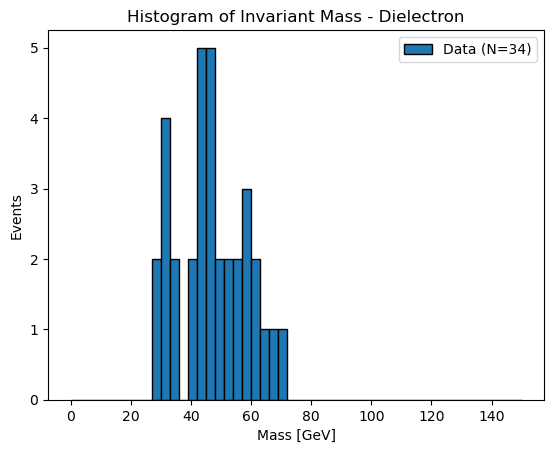

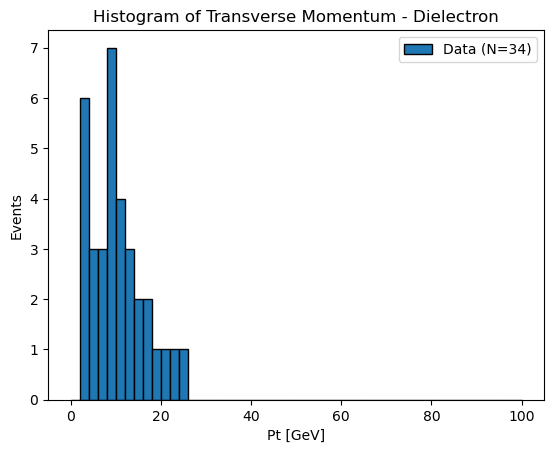

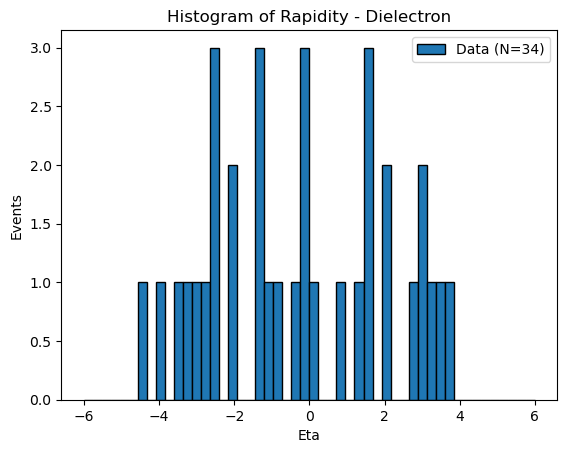

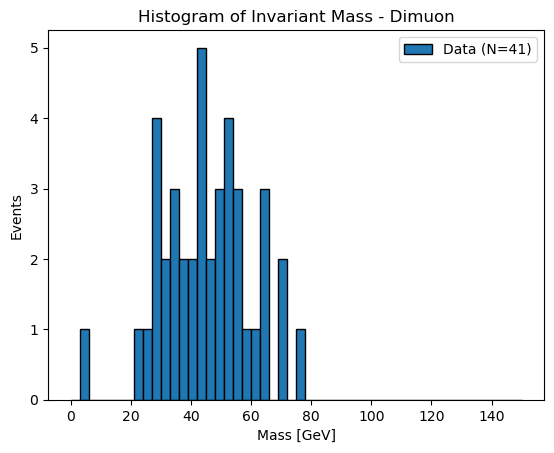

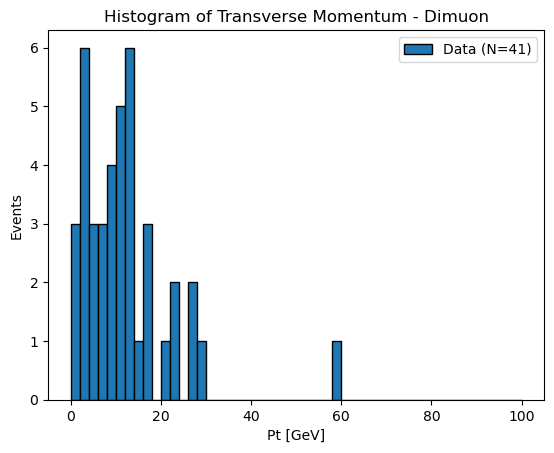

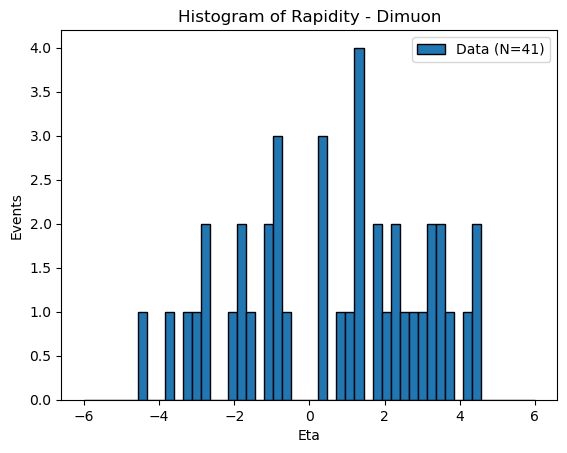

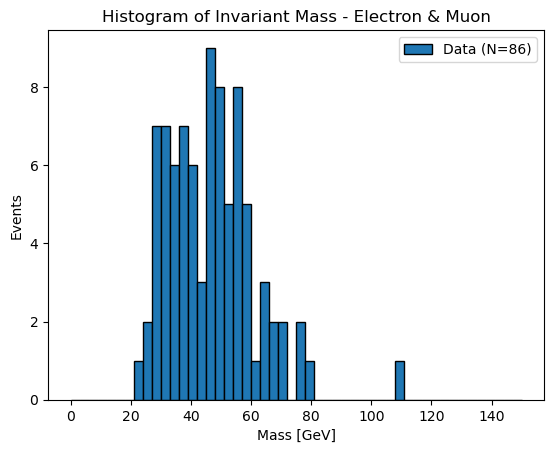

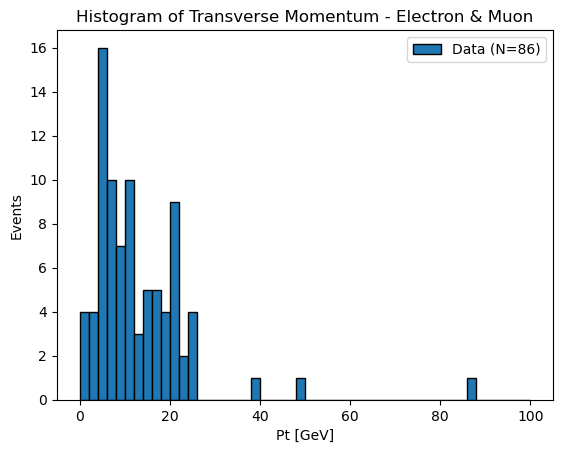

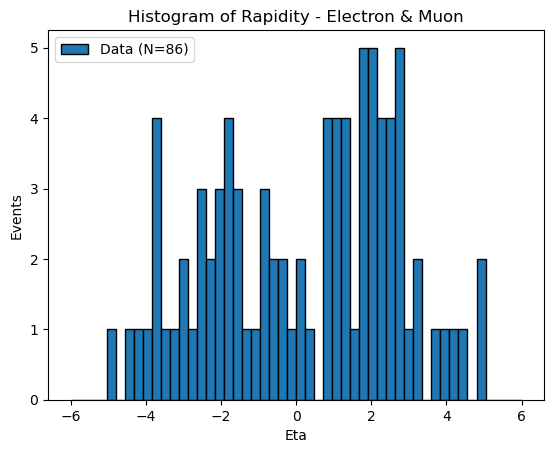

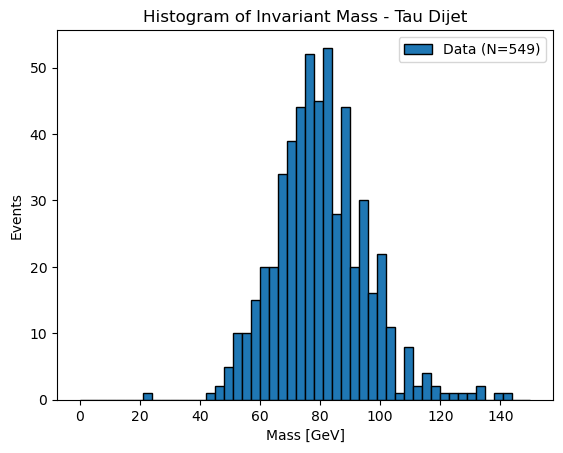

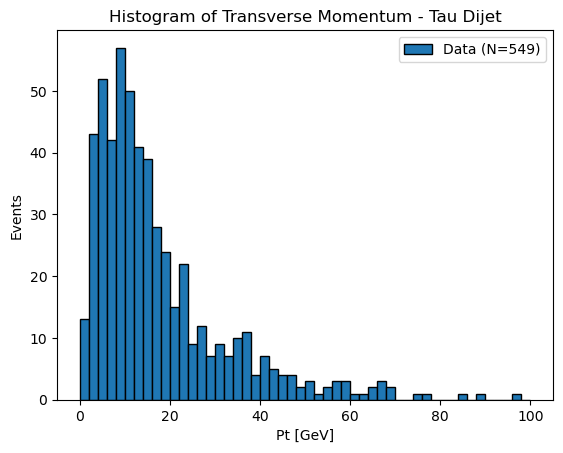

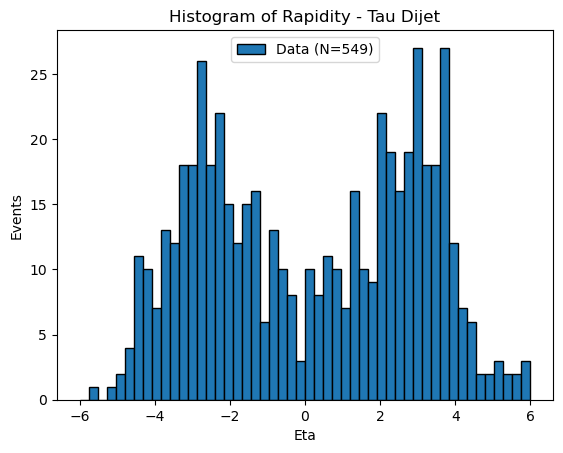

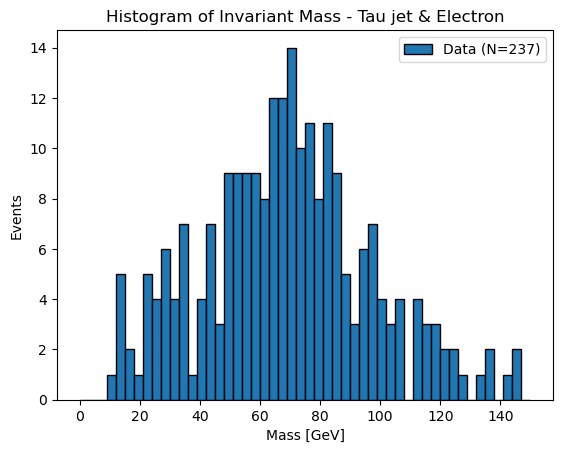

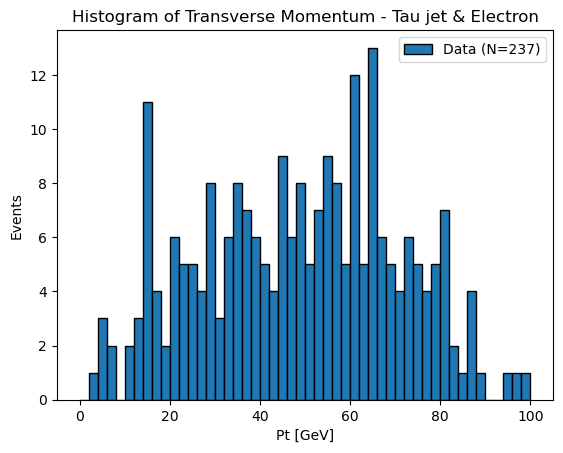

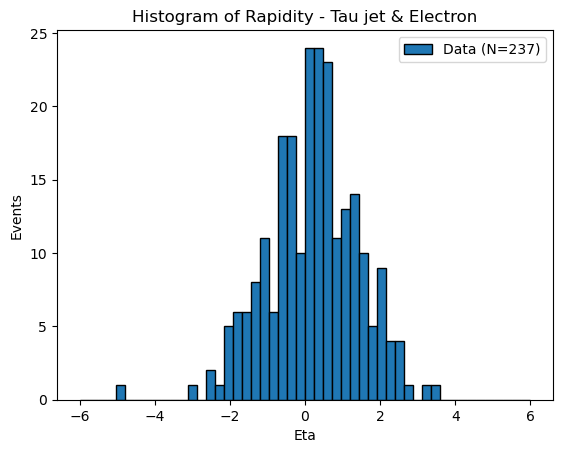

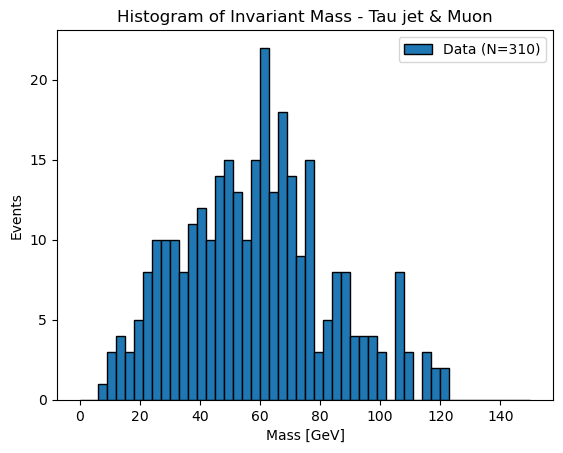

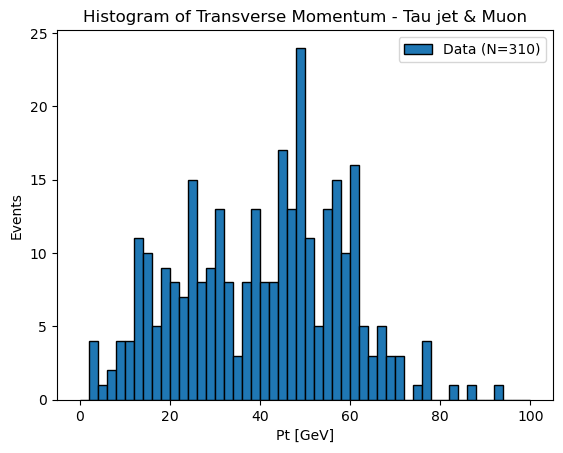

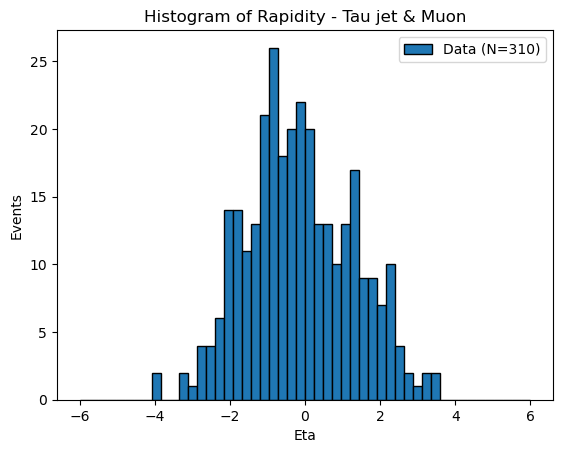

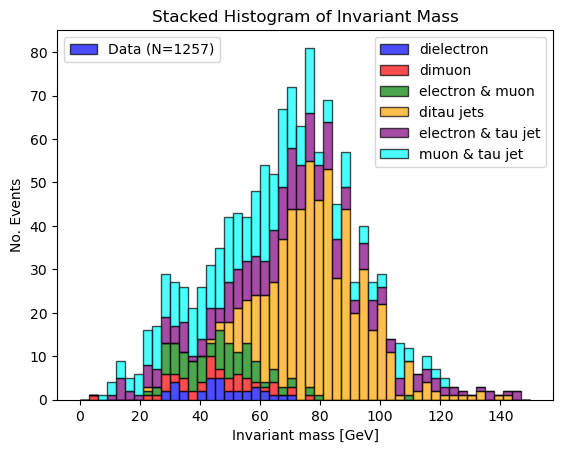

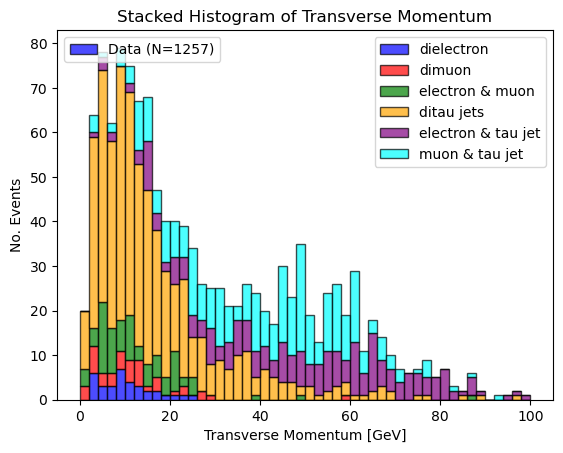

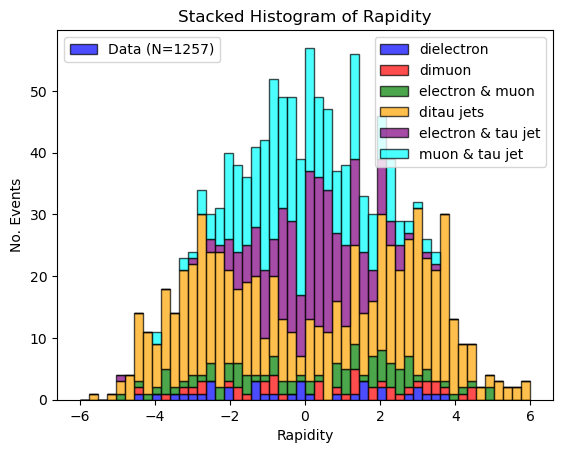

In [72]:
total_plotter(1, 1, 1, 1, 1, 1, True, 'tautau_production_no_cut', 'tautau_production_no_cut_plots', 0, 150)

In [ ]:
def tau_check(data):
    raw_data = data_extract(data)
    flavour_array = []
    total_flavour = []
    for i,event in enumerate(raw_data):
        locations = np.array([np.where(event['Jet.TauTag']==1)])[0,0]
        event_flavour = event['Jet.Flavour']
        for i in event_flavour:
            total_flavour.append(event_flavour[i])
        for i in locations:
            flavour_array.append(event_flavour[i])
    frequency_counter = Counter(flavour_array)
    total_count= len(flavour_array)
    print('The total number of tau tagged jets is: ' + total_count)
    for element, frequency in frequency_counter.items():
        percentage_freq = (frequency/total_count)*100
        print(f"Element {element} appears {percentage:.2f}% of the time.")
    return total_flavour, flavour_array
   
def flavour_plotter(data, title, imagename):
    plt.hist(data,bins=22, range=(0, 22), edgecolor = 'black')
   
    plt.title(title)

    plt.xlabel('Flavour')

    plt.ylabel('Events')
   
    total_count = len(data)

    plt.legend([f'Data (N={total_count})'])

    plt.savefig(imagename+".png")

    plt.show()